In [ ]:
# Reading the CSV file
import pandas as pd
import io
happiness = pd.read_csv('/content/happiness_data.csv')

In [ ]:
# To check if the CSV file has been imported correctly - prints the first 5 records

happiness.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [ ]:
# A. How much data is present ?
# Information about the features (columns) in the dataset

happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [ ]:
# A. What attributes/features are continuous valued ?
# Descriptive statistics on the data of the dataset.
happiness = happiness.drop(['year'],axis=1) #Dropping Year column as it can be ignored
happiness.describe()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


**A. What attributes/features are continuous valued ?**

All the above features/attributes are continuous valued.

Healthy Life expectancy at birth column has a very big Standard deviation, bigger than the rest

In [ ]:
# A. What attributes are categorical ?

happiness['Country name'].value_counts()

Zimbabwe        15
South Africa    15
Tanzania        15
Denmark         15
Tajikistan      15
                ..
Maldives         1
Suriname         1
Cuba             1
Oman             1
Guyana           1
Name: Country name, Length: 166, dtype: int64

**A. What attributes are categorical ?**

The country feature is categorical.

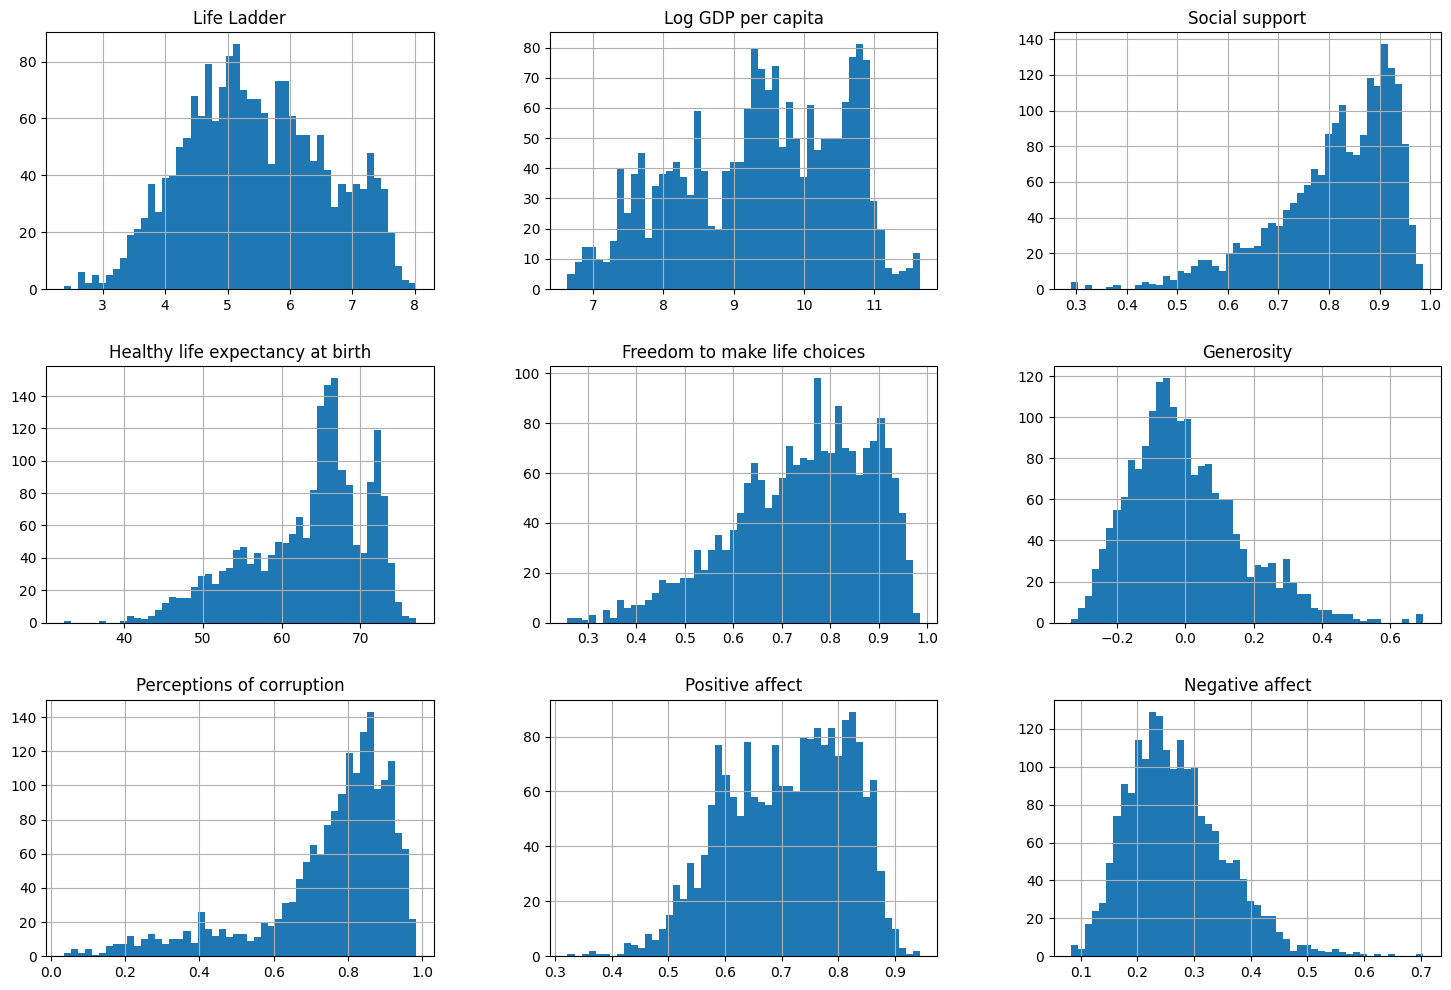

In [ ]:
# B. Visualization and summary Statistics

import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

happiness.hist(bins=50, figsize=(18, 12))
plt.show()


In [ ]:
print(happiness.skew())

Life Ladder                         0.068483
Log GDP per capita                 -0.308453
Social support                     -1.110682
Healthy life expectancy at birth   -0.744426
Freedom to make life choices       -0.623019
Generosity                          0.807140
Perceptions of corruption          -1.496045
Positive affect                    -0.364197
Negative affect                     0.737166
dtype: float64


<ipython-input-7-1c5fa16e3eb5>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(happiness.skew())


Life Ladder has perfect distribution, Others are either skewed left or right

In [ ]:
import numpy as np
happiness['Social support']=np.log1p(happiness['Social support'])
happiness['Perceptions of corruption']=np.log1p(happiness['Perceptions of corruption'])

In [ ]:
# B. Speacial treatment needed

null_counts = happiness.isnull().sum()
print(null_counts.sort_values(ascending= False).head(30))

# Perceptions of corruption
null_counts_perception = happiness.groupby('Country name')['Perceptions of corruption'].apply(lambda x: x.isnull().sum())

# Generosity
null_counts_generosity = happiness.groupby('Country name')['Generosity'].apply(lambda x: x.isnull().sum())

# Healthy life expectancy at birth
null_counts_healthy_life_expectancy = happiness.groupby('Country name')['Healthy life expectancy at birth'].apply(lambda x: x.isnull().sum())

print('Perceptions of corruption\n')
print(null_counts_perception.sort_values(ascending=False).head(15))
print('Generosity\n')
print(null_counts_generosity.sort_values(ascending=False).head(15))
print('Healthy life expectancy at birth\n')
print(null_counts_healthy_life_expectancy.sort_values(ascending=False).head(15))

Perceptions of corruption           110
Generosity                           89
Healthy life expectancy at birth     55
Log GDP per capita                   36
Freedom to make life choices         32
Positive affect                      22
Negative affect                      16
Social support                       13
Country name                          0
Life Ladder                           0
dtype: int64
Perceptions of corruption

Country name
China                   15
Saudi Arabia            12
Jordan                  11
United Arab Emirates    10
Turkmenistan            10
Kuwait                   7
Bahrain                  6
Egypt                    6
Malta                    5
Vietnam                  4
Qatar                    4
Yemen                    3
Libya                    2
Algeria                  2
Uzbekistan               2
Name: Perceptions of corruption, dtype: int64
Generosity

Country name
North Cyprus                7
Iran                        5
Kuwait     

In [ ]:
# For features with null values > 30- we replace Null values with median. For other features we simply drop.

null_rows_idx = happiness.isnull().any(axis=1)

happiness_1 = happiness.copy()
median = happiness["Generosity"].median()
happiness_1["Generosity"].fillna(median, inplace=True)  # option 3

median = happiness["Healthy life expectancy at birth"].median()
happiness_1["Healthy life expectancy at birth"].fillna(median, inplace=True)

median = happiness["Perceptions of corruption"].median()
happiness_1["Perceptions of corruption"].fillna(median, inplace=True)

median = happiness["Freedom to make life choices"].median()
happiness_1["Freedom to make life choices"].fillna(median, inplace=True)

median = happiness["Log GDP per capita"].median()
happiness_1["Log GDP per capita"].fillna(median, inplace=True)

null_counts_generosity = happiness_1.groupby('Country name')['Generosity'].apply(lambda x: x.isnull().sum())
null_counts_healthy = happiness_1.groupby('Country name')['Healthy life expectancy at birth'].apply(lambda x: x.isnull().sum())
null_counts_corruption = happiness_1.groupby('Country name')['Perceptions of corruption'].apply(lambda x: x.isnull().sum())
null_counts_corruption = happiness_1.groupby('Country name')['Freedom to make life choices'].apply(lambda x: x.isnull().sum())
null_counts_corruption = happiness_1.groupby('Country name')['Log GDP per capita'].apply(lambda x: x.isnull().sum())

happiness_1.dropna(subset=["Positive affect"], inplace=True)
happiness_1.dropna(subset=["Negative affect"], inplace=True)
happiness_1.dropna(subset=["Social support"], inplace=True)

null_counts = happiness_1.isnull().sum()
print(null_counts.sort_values(ascending= False).head(30))

print(happiness_1.info())

Country name                        0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1923 entries, 0 to 1948
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1923 non-null   object 
 1   Life Ladder                       1923 non-null   float64
 2   Log GDP per capita                1923 non-null   float64
 3   Social support                    1923 non-null   float64
 4   Healthy life expectancy at birth  1923 non-null   float64
 5   Freedom to make life choices      1923 non-null   floa

By this method, we are effectively wiping out few countries from this dataset due to poor information provided by those countries

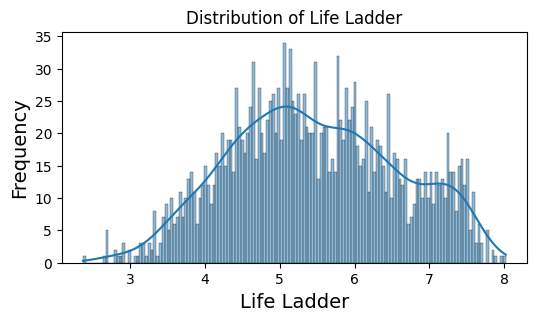

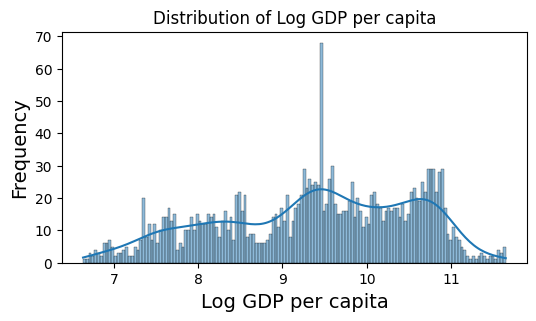

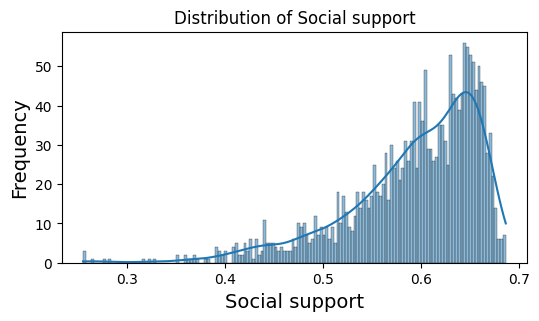

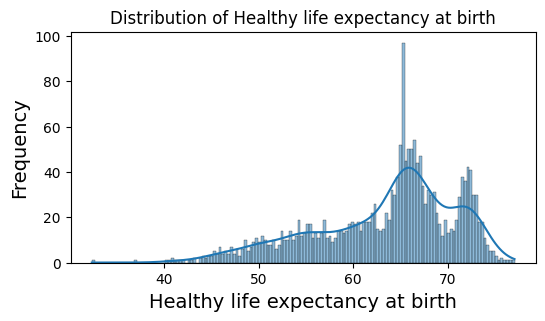

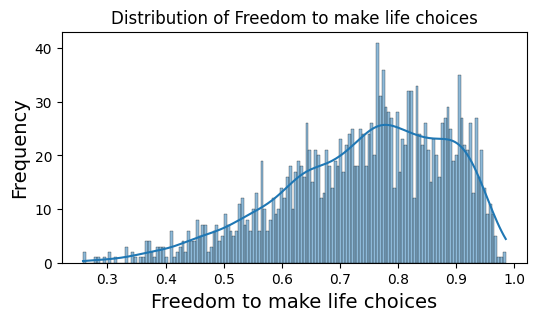

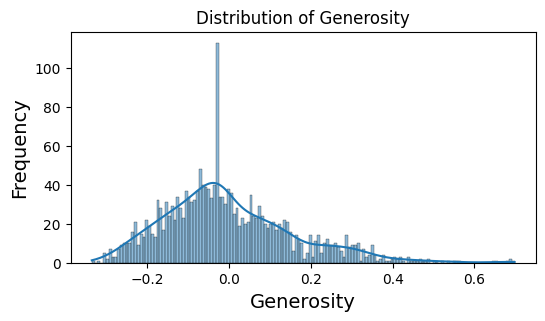

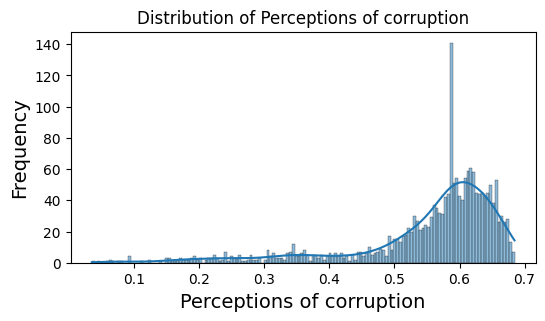

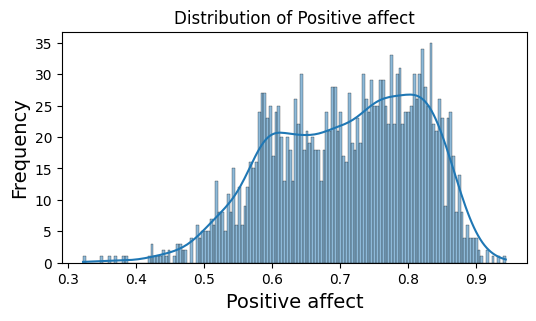

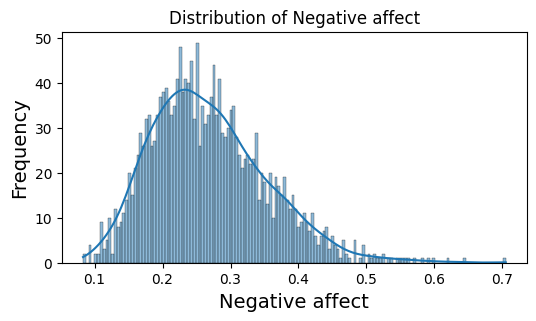

In [ ]:
# B. Visualization and summary Statistics

import seaborn as sns
import matplotlib.pyplot as plt
for column in happiness_1.select_dtypes(include='number'):
    plt.figure(figsize=(6, 3))
    sns.histplot(happiness_1[column], kde=True, bins = 150)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
# Correlation matrix
corr_matrix = happiness_1.corr()
print(corr_matrix,"\n")
print(corr_matrix["Life Ladder"].sort_values(ascending=False))

                                  Life Ladder  Log GDP per capita  \
Life Ladder                          1.000000            0.783100   
Log GDP per capita                   0.783100            1.000000   
Social support                       0.696077            0.675330   
Healthy life expectancy at birth     0.743347            0.837245   
Freedom to make life choices         0.526332            0.360736   
Generosity                           0.180929           -0.006281   
Perceptions of corruption           -0.414249           -0.335064   
Positive affect                      0.531717            0.298122   
Negative affect                     -0.297880           -0.205746   

                                  Social support  \
Life Ladder                             0.696077   
Log GDP per capita                      0.675330   
Social support                          1.000000   
Healthy life expectancy at birth        0.606984   
Freedom to make life choices            0.403187 

<ipython-input-12-dc0ef5d106c7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = happiness_1.corr()


<Axes: >

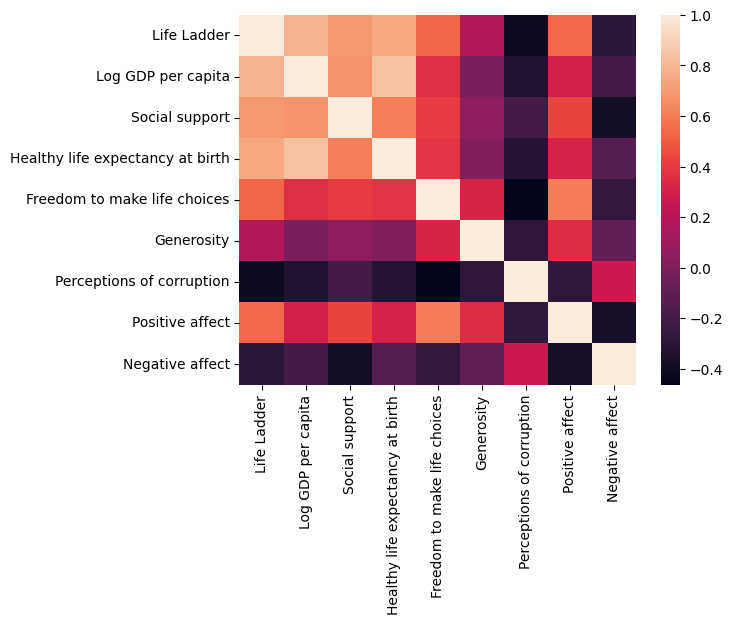

In [ ]:
sns.heatmap(corr_matrix)

There is a strong positive corelation between the label and the "Log GDP per capita", "Healthy life expectancy at birth" and "Social support".

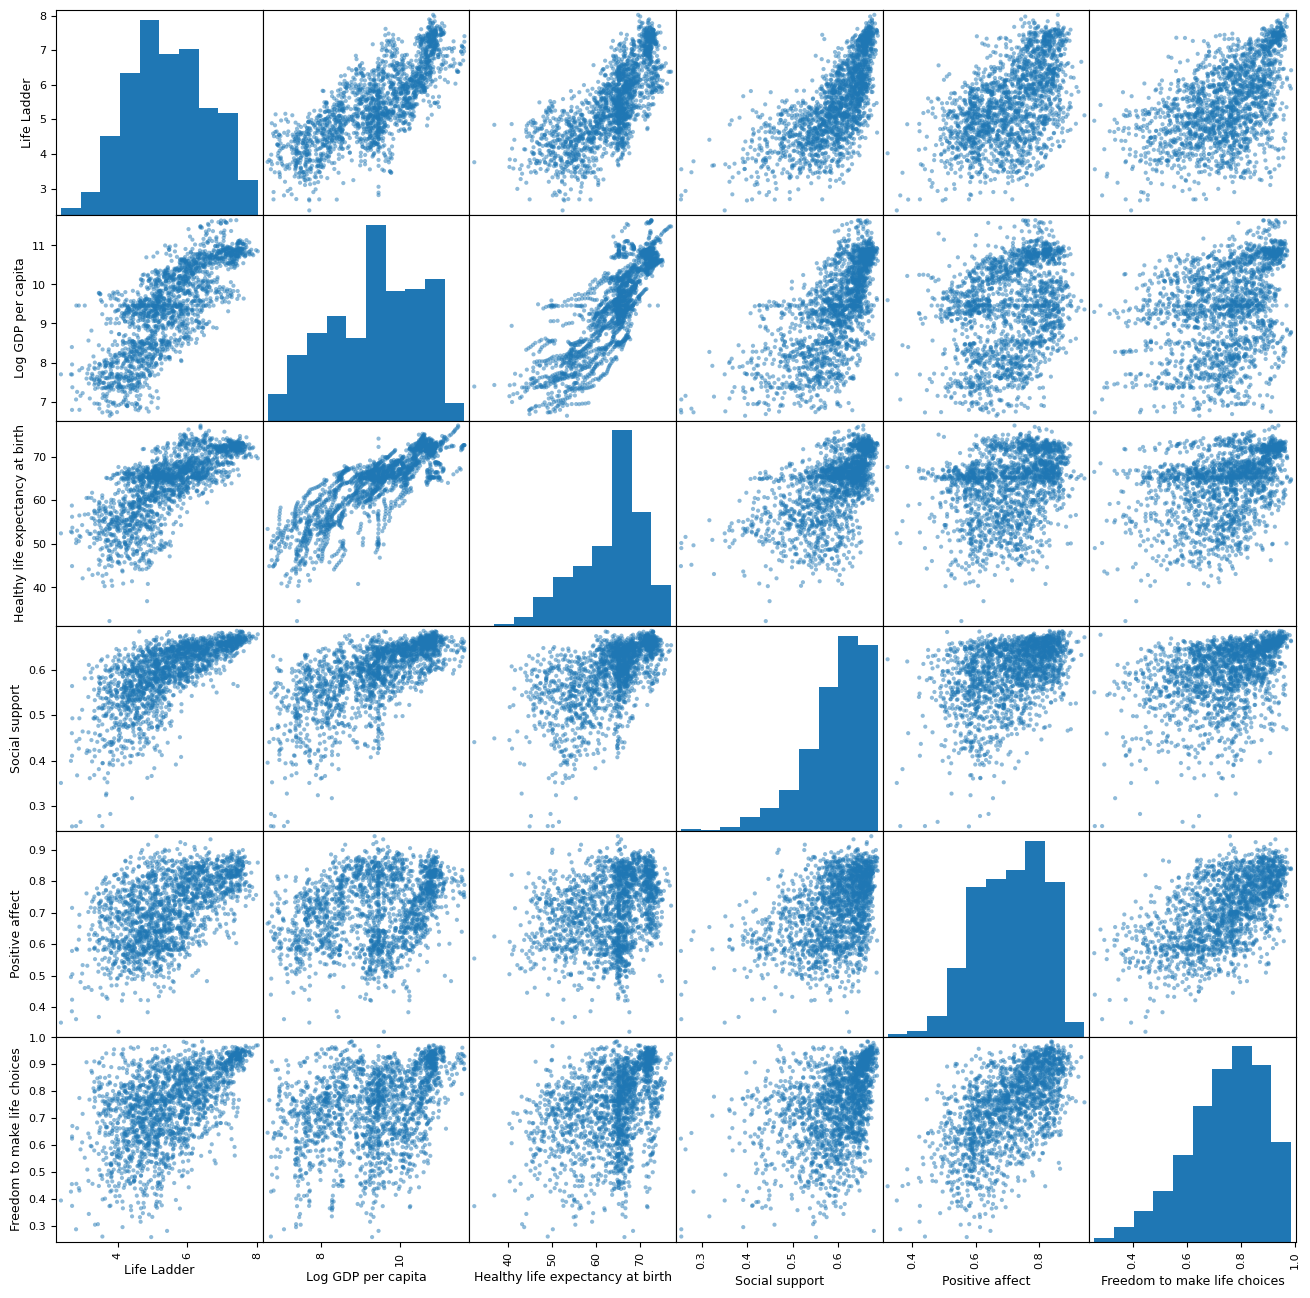

In [ ]:
#Pearson's correlation

from pandas.plotting import scatter_matrix

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=6)
plt.rc('axes', labelsize=9, titlesize=9)
plt.rc('xtick', labelsize=9)
plt.rc('ytick', labelsize=9)

# Considering the the attributes whose correlation matrix absolute values with 'Life Ladder' > 0.5
attributes = ["Life Ladder", "Log GDP per capita", "Healthy life expectancy at birth",
              "Social support", "Positive affect", "Freedom to make life choices"]
scatter_matrix(happiness_1[attributes], figsize=(16, 16))
plt.show()

After the code clean up, the correlation matrix was about the same.

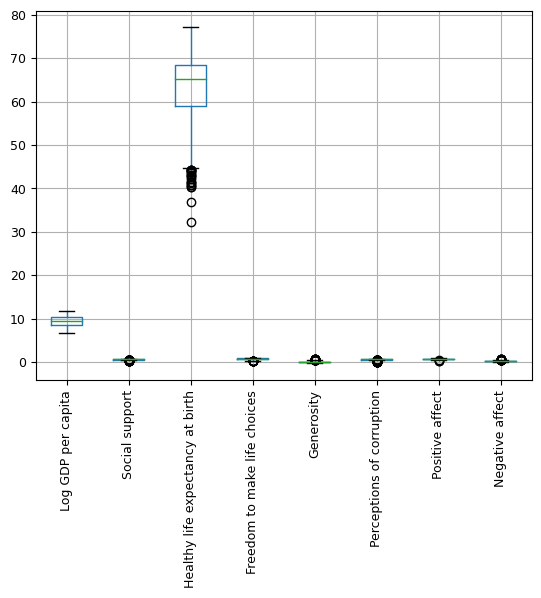

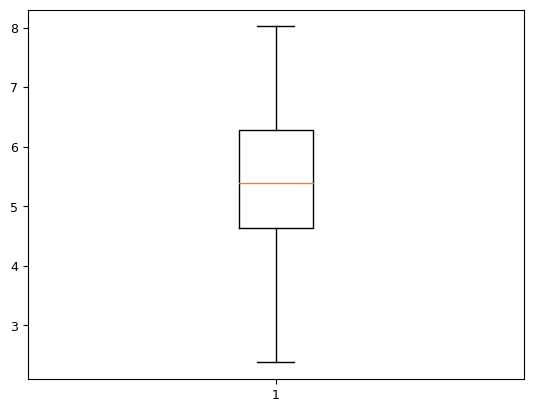

In [ ]:
# Check for outliers
happiness_1.drop(columns=['Life Ladder']).boxplot(rot = 90)
plt.show()
plt.boxplot(happiness_1['Life Ladder'])
plt.show()

In [ ]:
from sklearn.preprocessing import RobustScaler
#Robust Scaler to take care of outliers

scaler = RobustScaler()

scaled_features = scaler.fit_transform(happiness_1[['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth','Freedom to make life choices','Generosity','Perceptions of corruption', 'Positive affect','Negative affect']])

happiness_1[['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth','Freedom to make life choices','Generosity','Perceptions of corruption', 'Positive affect','Negative affect']] = scaled_features


In [ ]:
# One hot encoding for the column - Country

from sklearn.preprocessing import OneHotEncoder
import numpy as np

one_hot_encoded_data = pd.get_dummies(happiness_1, columns = ['Country name'])

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame named 'data' and you want to predict the 'target' column
X = one_hot_encoded_data.drop(columns=['Life Ladder'])  # Features
y = one_hot_encoded_data['Life Ladder']  # Target variable

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Verify representativeness of the test data
print("\nX Training data shape:", X_train.shape)
print("X Testing data shape:", X_test.shape)

print("\nY Training data shape:", y_train.shape)
print("Y Testing data shape:", y_test.shape)


X Training data shape: (1538, 172)
X Testing data shape: (385, 172)

Y Training data shape: (1538,)
Y Testing data shape: (385,)


In [ ]:
#Verify if the test portion representative of the entire data set
test_mean = y_test.mean()
train_mean = y_train.mean()
total_mean = happiness_1['Life Ladder'].mean()
print(total_mean, train_mean, test_mean)

5.4661866874674985 5.45630299089727 5.50567012987013


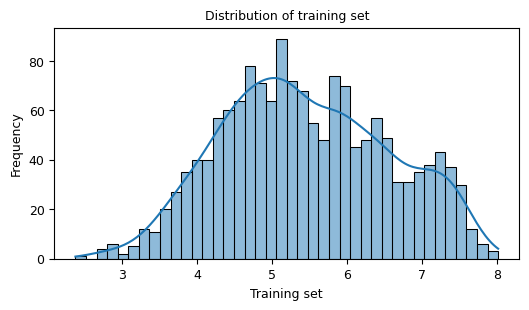

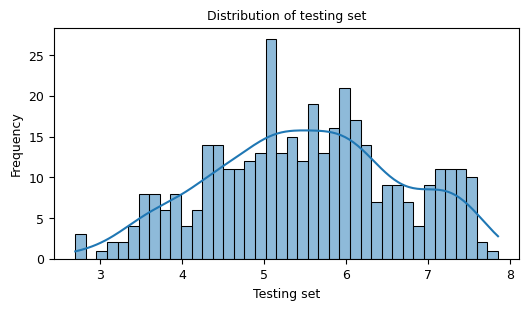

In [ ]:
#Show Distribution of Training and Test set data
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 3))
sns.histplot(y_train, kde=True, bins = 40)
plt.title(f'Distribution of training set')
plt.xlabel('Training set')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(6, 3))
sns.histplot(y_test, kde=True, bins = 40)
plt.title(f'Distribution of testing set')
plt.xlabel('Testing set')
plt.ylabel('Frequency')
plt.show()

The difference between mean of test and training is negligible, and the distribution of the training and testing sets are close.

Now, we are creating a 4 fold cross validation data set. We are finding the MSE values for Normal and SGD for one parameter.

We are also testing out Lasso, Ridge and Elastic Net regularization techniques with different hyperparameters to assess the situation better to obtain a better model and understanding

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Finding best alphas using Grid Search CV
alphas=[0.001,0.01,0.1,1,10]
batch_sizes = [1, 10, 100, 1000]

#FInding best alphas using K-Fold Cross Validation while expanding and comparing with other values
# Define the number of folds for cross-validation
n_splits = 4
# Initialize lists to store MSE values for each fold
normal_mse_scores = []
l_0_001_mse_scores = []
l_0_01_mse_scores = []
l_0_1_mse_scores = []
l_1_mse_scores = []
l_10_mse_scores = []
sgd_mse_scores = []
r_0_001_mse_scores = []
r_0_01_mse_scores = []
r_0_1_mse_scores = []
r_1_mse_scores = []
r_10_mse_scores = []
e_0_001_mse_scores = []
e_0_01_mse_scores = []
e_0_1_mse_scores = []
e_1_mse_scores = []
e_10_mse_scores = []

# Create a KFold cross-validator
kf = KFold(n_splits=n_splits)
# Perform cross-validation
normal_model = LinearRegression()
for train_idx, val_idx in kf.split(X_train):

    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
    # Fit the Linear Regression model using the closed-form solution
    normal_model.fit(X_train_fold, y_train_fold)
    # Make predictions on the validation set
    y_val_pred = normal_model.predict(X_val_fold)
    # Calculate the MSE for this fold
    n_mse = mean_squared_error(y_val_fold, y_val_pred)
    normal_mse_scores.append(n_mse)

    #Training with SGD (Stochastic Gradient Descent)
    sgd_model=SGDRegressor(learning_rate='adaptive', max_iter=1000000, tol=1e-3, penalty='l2', eta0=0.001)
    sgd_model.fit(X_train_fold, y_train_fold.ravel())
    sgd_predictions = sgd_model.predict(X_val_fold)
    # Calculate MSE for this fold
    sgd_mse = mean_squared_error(y_val_fold, sgd_predictions)
    sgd_mse_scores.append(sgd_mse)

    # Training with Lasso
    for item in alphas:
      l_model = Lasso(alpha=item,max_iter=100000)
      l_model.fit(X_train_fold, y_train_fold)
      yl_val_pred = l_model.predict(X_val_fold)
      l_mse = mean_squared_error(y_val_fold, yl_val_pred)

      # Training with Ridge
      r_model = Ridge(alpha=item,max_iter=100000)
      r_model.fit(X_train_fold, y_train_fold)
      r_yl_val_pred = r_model.predict(X_val_fold)
      r_mse = mean_squared_error(y_val_fold, r_yl_val_pred)

      #Training with ElasticNet
      elastic_net = ElasticNet(alpha=item, l1_ratio=0.5,max_iter=100000)
      elastic_net.fit(X_train_fold, y_train_fold)
      e_y_pred = elastic_net.predict(X_val_fold)
      e_mse = mean_squared_error(y_val_fold, e_y_pred)
      if item==0.001:
        e_0_001_mse_scores.append(e_mse)
        r_0_001_mse_scores.append(r_mse)
        l_0_001_mse_scores.append(l_mse)
      elif item==0.01:
        e_0_01_mse_scores.append(e_mse)
        r_0_01_mse_scores.append(r_mse)
        l_0_01_mse_scores.append(l_mse)
      elif item==0.1:
        e_0_1_mse_scores.append(e_mse)
        r_0_1_mse_scores.append(r_mse)
        l_0_1_mse_scores.append(l_mse)
      elif item==1:
        e_1_mse_scores.append(e_mse)
        r_1_mse_scores.append(r_mse)
        l_1_mse_scores.append(l_mse)
      else:
        e_10_mse_scores.append(e_mse)
        r_10_mse_scores.append(r_mse)
        l_10_mse_scores.append(l_mse)

# Calculate the mean MSE across all folds
normal_mean_mse = np.mean(normal_mse_scores)
sgd_mean_mse = np.mean(sgd_mse_scores)
l_0_001_mse_mean = np.mean(l_0_001_mse_scores)
l_0_01_mse_mean = np.mean(l_0_01_mse_scores)
l_0_1_mse_mean = np.mean(l_0_1_mse_scores)
l_1_mse_mean = np.mean(l_1_mse_scores)
l_10_mse_mean = np.mean(l_10_mse_scores)
r_0_001_mse_mean = np.mean(r_0_001_mse_scores)
r_0_01_mse_mean= np.mean(r_0_01_mse_scores)
r_0_1_mse_mean = np.mean(r_0_1_mse_scores)
r_1_mse_mean = np.mean(r_1_mse_scores)
r_10_mse_mean = np.mean(r_10_mse_scores)
e_0_001_mse_mean = np.mean(e_0_001_mse_scores)
e_0_01_mse_mean = np.mean(e_0_01_mse_scores)
e_0_1_mse_mean = np.mean(e_0_1_mse_scores)
e_1_mse_mean = np.mean(e_1_mse_scores)
e_10_mse_mean = np.mean(e_10_mse_scores)
l_values=[l_0_001_mse_mean,l_0_01_mse_mean,l_0_1_mse_mean,l_1_mse_mean,l_10_mse_mean]
r_values=[r_0_001_mse_mean,r_0_01_mse_mean,r_0_1_mse_mean,r_1_mse_mean,r_10_mse_mean]
e_values=[e_0_001_mse_mean,e_0_01_mse_mean,e_0_1_mse_mean,e_1_mse_mean,e_10_mse_mean]


print("Mean MSE using Closed-Form Solution:", normal_mean_mse)
print("\nMean MSE using SGD with alpha as 0.001:", sgd_mean_mse)
print("\nMean MSE using Lasso alphas = 0.001, 0.01, 0.1, 1and 10 are:\n", l_values)
print("\nMean MSE using Ridge alphas = 0.001, 0.01, 0.1, 1 and 10 are:\n", r_values)
print("\nMean MSE using Elastic Net alphas = 0.001, 0.01, 0.1, 1 and 10 are:\n", e_values)

lasso = Lasso()
ridge = Ridge()
elastic_net = ElasticNet()
param_grid={'alpha':alphas}
lasso_cv = GridSearchCV(lasso, param_grid, cv=4, scoring='neg_mean_squared_error')
ridge_cv = GridSearchCV(ridge, param_grid, cv=4, scoring='neg_mean_squared_error')
elastic_net_cv = GridSearchCV(elastic_net, param_grid, cv=4, scoring='neg_mean_squared_error')
lasso_cv.fit(X_train, y_train)
ridge_cv.fit(X_train, y_train)
elastic_net_cv.fit(X_train, y_train)

best_alpha_lasso = lasso_cv.best_params_['alpha']
best_lasso_model = lasso_cv.best_estimator_

best_alpha_ridge = ridge_cv.best_params_['alpha']
best_ridge_model = ridge_cv.best_estimator_

best_alpha_elastic_net = elastic_net_cv.best_params_['alpha']
best_elastic_net_model = elastic_net_cv.best_estimator_

print("Best alpha for lasso:",best_alpha_lasso)
print("Best alpha for Ridge:",best_alpha_ridge)
print("Best alpha for Elastic Net:",best_alpha_elastic_net)


Mean MSE using Closed-Form Solution: 6.17727285122926e+20

Mean MSE using SGD with alpha as 0.001: 0.23855129671263375

Mean MSE using Lasso alphas = 0.001, 0.01, 0.1, 1and 10 are:
 [0.16265603774486015, 0.3119140172228349, 0.358286840487948, 1.2383173325383168, 1.2383173325383168]

Mean MSE using Ridge alphas = 0.001, 0.01, 0.1, 1 and 10 are:
 [0.1470203855362068, 0.14681103246307997, 0.14580018284655552, 0.1462766406661943, 0.19959578556225346]

Mean MSE using Elastic Net alphas = 0.001, 0.01, 0.1, 1 and 10 are:
 [0.15317462442403526, 0.2882458581325995, 0.33288489356631484, 1.0543912048962512, 1.2383173325383168]
Best alpha for lasso: 0.001
Best alpha for Ridge: 0.1
Best alpha for Elastic Net: 0.001


Now, we see the various MSEs for different models.
The MSE for Linear Regression is very huge. We move forward with regularization.
The MSE reduces drastically when we use SGD with alpha 0.001. We will look into SGD with learning rates and batch sizes in next block.

We can see how as alpha values increases, MSEs for Lasso and Elastic Net increase, but for Ridge it decreases but very slowly, but also suddenly has a spike.
The MSE for Lasso also stabilizes at 1.1238





Here, we are iterating through different hyperparameters for SGD to obtain the best possible model

In [ ]:
from numpy.ma.core import mean
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

batch_sizes = [1, 10, 100]
learning_rates = [0.001, 0.01, 0.1]

# Dictionaries to store results
total_train_loss = {}
total_val_loss = {}
train_loss={}
val_loss={}

# Iterate through different batch sizes and learning rates
for b in batch_sizes:
    for lt in learning_rates:
        # Initialize SGDRegressor
        sgd_model = SGDRegressor(max_iter=1, tol=None, eta0=lt, learning_rate="constant", penalty=None, random_state=42)

        # Lists to store training and validation loss
        training_loss = []
        validation_loss = []

        # Training loop
        for epoch in range(100):  # 100 epochs
            for i in range(0, len(X_train), b):
                X_batch = X_train[i:i+b]
                y_batch = y_train[i:i+b]
                sgd_model.partial_fit(X_batch, y_batch)

            # Compute training loss
            y_train_pred = sgd_model.predict(X_train)
            train_loss[(b, lt, epoch)] = mean_squared_error(y_train, y_train_pred)
            training_loss.append(train_loss[(b, lt, epoch)])

            # Compute validation loss
            y_val_pred = sgd_model.predict(X_test)
            val_loss[(b, lt, epoch)] = mean_squared_error(y_test, y_val_pred)
            validation_loss.append(val_loss[(b, lt, epoch)])

        total_train_loss[(b, lt)] = mean(training_loss)
        total_val_loss[(b, lt)] = mean(validation_loss)

print(total_train_loss)
print(total_val_loss)
min_key, min_value = min(total_train_loss.items(), key=lambda x: x[1])
print(f"Least training loss for values: {min_key}, Value is: {min_value}")
min_key, min_value = min(total_val_loss.items(), key=lambda x: x[1])
print(f"Least Validation loss for values: {min_key}, Value is: {min_value}")

{(1, 0.001): 0.22238924413321076, (1, 0.01): 0.12708229179945982, (1, 0.1): 0.23885332707893064, (10, 0.001): 0.22239868631392365, (10, 0.01): 0.12718553721232292, (10, 0.1): 0.22522029714978126, (100, 0.001): 0.2224860946060331, (100, 0.01): 0.12684614550922546, (100, 0.1): 0.2033828023028784}
{(1, 0.001): 0.22580329618450826, (1, 0.01): 0.15842933584658808, (1, 0.1): 0.2842278862925896, (10, 0.001): 0.22584563540067623, (10, 0.01): 0.15850106341558365, (10, 0.1): 0.24757483455086393, (100, 0.001): 0.2259219386569573, (100, 0.01): 0.15807416612725367, (100, 0.1): 0.24785003411222647}
Least training loss for values: (100, 0.01), Value is: 0.12684614550922546
Least Validation loss for values: (100, 0.01), Value is: 0.15807416612725367


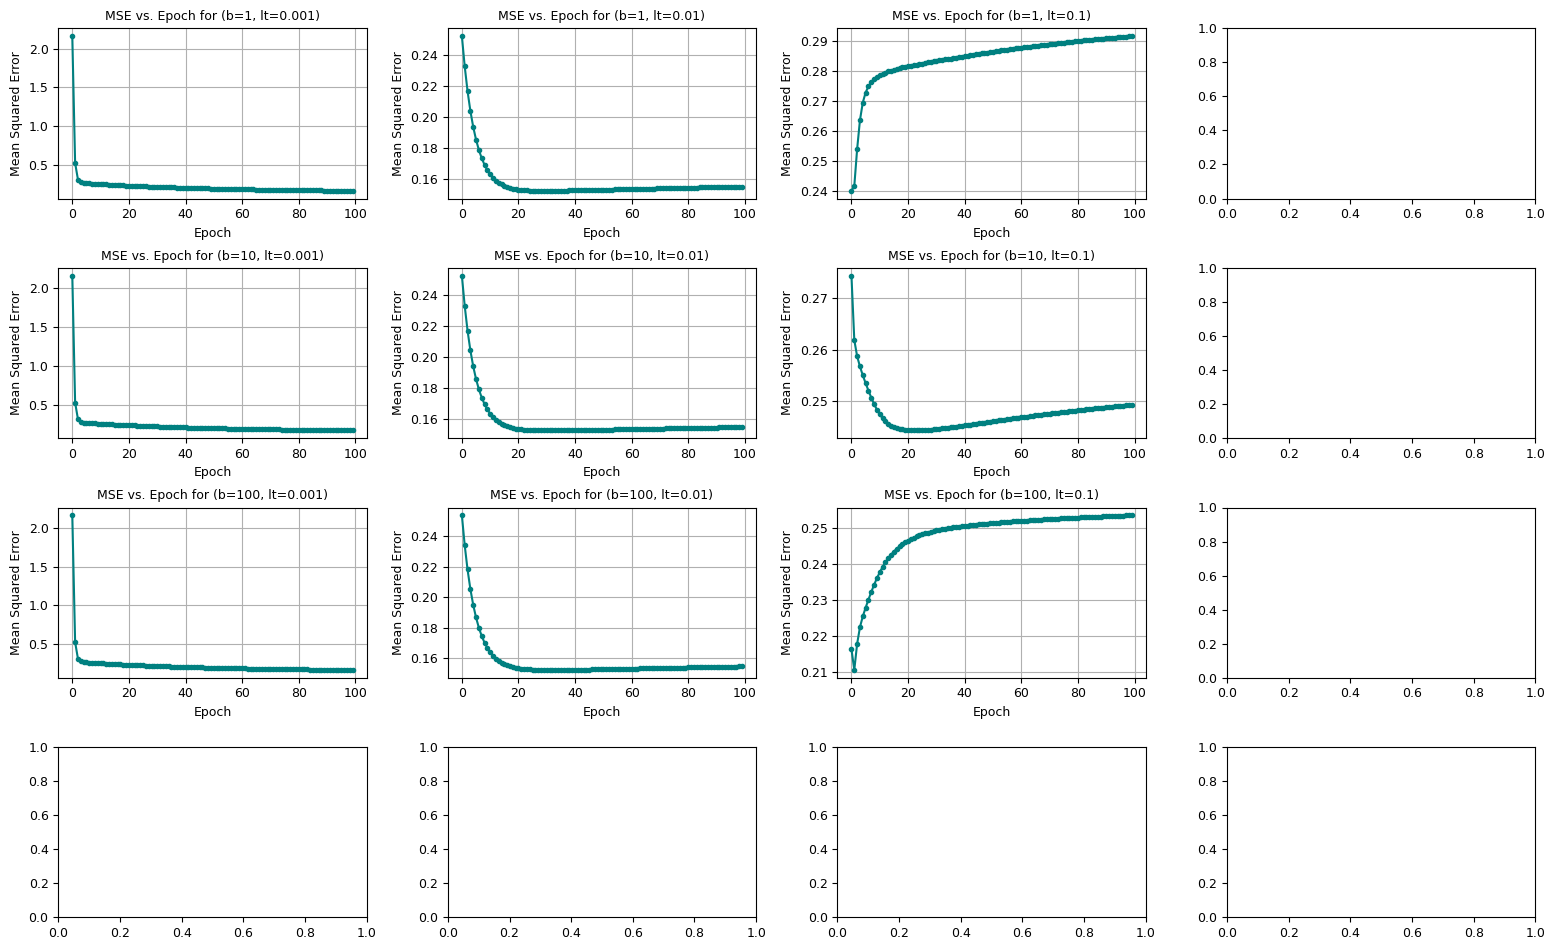

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 4, figsize=(16, 10))
fig.tight_layout(pad=5.0)

for i, b in enumerate(batch_sizes):
    for j, lt in enumerate(learning_rates):
        ax = axs[i, j]
        ax.set_title(f'MSE vs. Epoch for (b={b}, lt={lt})')
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Mean Squared Error')

        filtered_data = {key: mse for key, mse in val_loss.items() if key[:2] == (b, lt)}

        # Sort the data by epoch
        sorted_data = sorted(filtered_data.items(), key=lambda x: x[0][2])

        # Extract epochs and corresponding MSE values
        epochs, mses = zip(*[(key[2], mse) for key, mse in sorted_data])
        ax.plot(epochs, mses, marker='o', linestyle='-', markersize=3, color='#008080')
        ax.grid(True)

plt.show()

After iterating through all the various learning rates and batch sizes in SGD, we obtain the best possible one with low MSE.

After comparison, we come to the conclusion that SGD with batch size 10 and learning rate 0.01 provided the best model with low MSE, in the case of Linear Regression.

We will use R Squared(R2), Mean absolute error(MAE) and Mean Squared Error(MSE) as metrics to judge the model.

MSE measures the average squared difference between the actual values and the predicted values by the regression model.

MAE is similar to MSE but measures the average absolute difference between actual and predicted values. Like MSE, lower MAE values indicate better model performance.

R-squared, also known as the coefficient of determination, measures the proportion of the variance in the dependent tqrget that is explained by the independent features in your regression model. It gives us an indea of how well the model fits the data.

Mean Squared Error (MSE): 0.1549653674172414
Mean Absolute Error (MAE): 0.2817106897895852
R-squared (R2): 0.8806921201093544


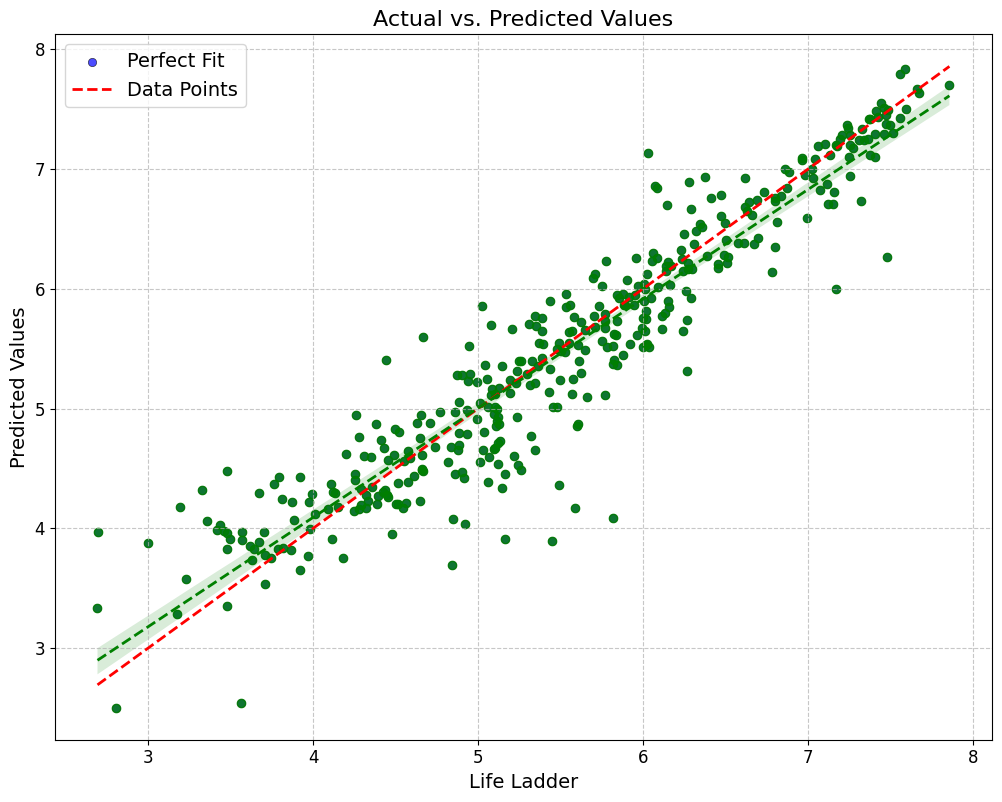

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

# Make predictions on the test data
sgd_model_main = SGDRegressor(max_iter=1, tol=None, eta0=0.01, learning_rate="constant", penalty=None, random_state=42)

        # Lists to store training and validation loss
training_loss = []
validation_loss = []

b=10
for epoch in range(100):  # 100 epochs
    for i in range(0, len(X_train), b):
        X_batch = X_train[i:i+b]
        y_batch = y_train[i:i+b]
        sgd_model_main.partial_fit(X_batch, y_batch)
y_train_pred = sgd_model_main.predict(X_train)
y_test_pred = sgd_model_main.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

# Print the evaluation metrics
bold = "\033[1m"
reset = "\033[0m"

print(bold + "Training Mean Squared Error (MSE):" + reset, train_mse)
print(bold + "Testing Mean Squared Error (MSE):" + reset, val_mse)
print(bold + "Testing Mean Absolute Error (MAE):" + reset, mae)
print(bold + "R-squared (R2):" + reset, r2)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))

# Create a scatter plot
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.7, edgecolors='k', linewidths=0.5)

# Add a line representing a perfect fit (y_test = y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2, label='Perfect Fit')

plt.title('Actual vs. Predicted Values', fontsize=16)
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.legend(['Perfect Fit', 'Data Points'], loc='upper left', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

sns.regplot(x=y_test, y=y_test_pred, color='green', line_kws={"color": "green", "linestyle": "--", "linewidth": 2})

plt.tight_layout()
plt.show()


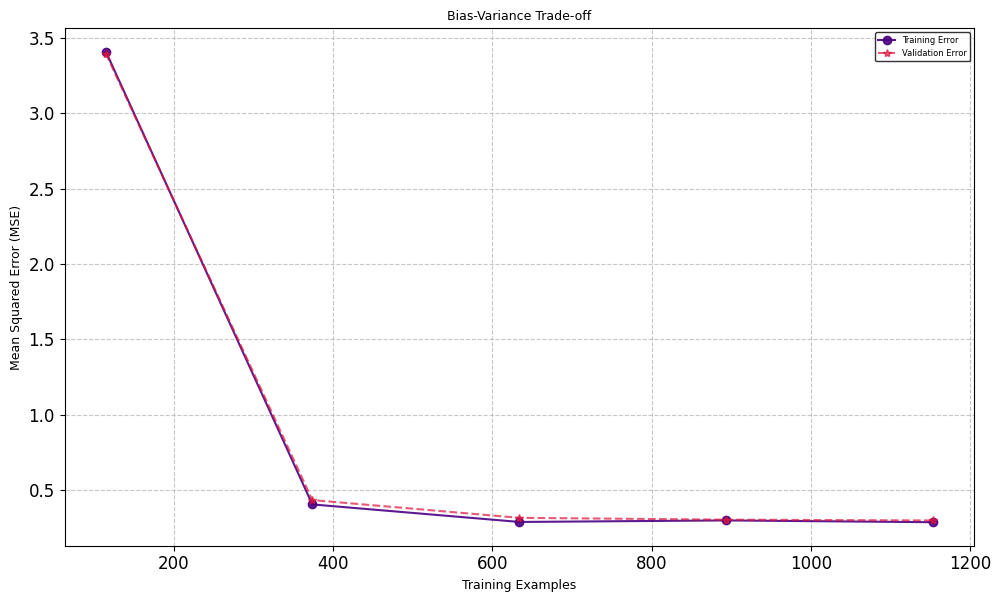

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_bias_variance_tradeoff(model, X, y, cv=4):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, scoring='neg_mean_squared_error')

    train_mse_mean = -np.mean(train_scores, axis=1)
    test_mse_mean = -np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))

    plt.plot(train_sizes, train_mse_mean, label='Training Error', linestyle='-', marker='o', color='indigo', alpha=0.9)
    plt.plot(train_sizes, test_mse_mean, label='Validation Error', linestyle='--', marker='*', color='crimson', alpha=0.7)

    plt.title('Bias-Variance Trade-off')
    plt.xlabel('Training Examples')
    plt.ylabel('Mean Squared Error (MSE)')

    # Add a legend with a fancy box
    plt.legend(loc='best', fancybox=True, framealpha=0.8)

    # Add grid lines with a dashed style
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Add a shadow to the legend frame
    legend = plt.legend()
    legend.get_frame().set_linewidth(1)
    legend.get_frame().set_edgecolor('black')

    plt.tight_layout()
    plt.show()

plot_bias_variance_tradeoff(sgd_model_main, X_train, y_train)



This shows there is good Bias-Variance trade off for this model, it even fits for unseen data well, thus having low variance.The training MSE being less shows it has low bias as well.

We can say this model is not overfitting or underfitting



We now follow the same methods in Polynomial regression

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

poly_features = PolynomialFeatures(degree=2, include_bias=False)
# Create a polynomial regression pipeline
degrees = [1, 2]

# Store cross-validation MSE for each degree
mses_poly = []

for degree in degrees:
    poly_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    # Perform 4-fold cross-validation
    scores_poly = cross_val_score(poly_reg, X_train, y_train, cv=4, scoring='neg_mean_squared_error')
    # Convert negative MSE to positive for evaluation
    scores_poly = -scores_poly
    avg_mse_poly = scores_poly.mean()
    mses_poly.append(np.sqrt(avg_mse_poly))

# Find the degree with the lowest cross-validation MSE
print(mses_poly)
best_degree = degrees[mses_poly.index(min(mses_poly))]
print("\nBest Polynomial Regression Degree:", best_degree)
print("Cross-Validation MSE for Best Degree:", min(mses_poly))

X_poly = poly_features.fit_transform(X_train)
lasso = Lasso()
ridge = Ridge()
elastic_net = ElasticNet()
param_grid={'alpha':alphas}
lasso_cv = GridSearchCV(lasso, param_grid, cv=4, scoring='neg_mean_squared_error')
ridge_cv = GridSearchCV(ridge, param_grid, cv=4, scoring='neg_mean_squared_error')
elastic_net_cv = GridSearchCV(elastic_net, param_grid, cv=4, scoring='neg_mean_squared_error')
lasso_cv.fit(X_poly, y_train)
ridge_cv.fit(X_poly, y_train)
elastic_net_cv.fit(X_poly, y_train)

best_alpha_lasso = lasso_cv.best_params_['alpha']
best_lasso_model = lasso_cv.best_estimator_

best_alpha_ridge = ridge_cv.best_params_['alpha']
best_ridge_model = ridge_cv.best_estimator_

best_alpha_elastic_net = elastic_net_cv.best_params_['alpha']
best_elastic_net_model = elastic_net_cv.best_estimator_

print("Best alpha for lasso:",best_alpha_lasso)
print("Best alpha for Ridge:",best_alpha_ridge)
print("Best alpha for Elastic Net:",best_alpha_elastic_net)

lt=[0.001,0.01,0.1,1,10]
#FInding best alphas using K-Fold Cross Validation while expanding and comparing with other values

# Define the number of folds for cross-validation
n_splits = 4
# Initialize lists to store MSE values for each fold
p_mse_scores = []
l_0_001_mse_scores = []
l_0_01_mse_scores = []
l_0_1_mse_scores = []
l_1_mse_scores = []
l_10_mse_scores = []
sgd_mse_scores = []
r_0_001_mse_scores = []
r_0_01_mse_scores = []
r_0_1_mse_scores = []
r_1_mse_scores = []
r_10_mse_scores = []
e_0_001_mse_scores = []
e_0_01_mse_scores = []
e_0_1_mse_scores = []
e_1_mse_scores = []
e_10_mse_scores = []
# Create a KFold cross-validator
kf = KFold(n_splits=n_splits)

# Perform cross-validation
for train_idx, val_idx in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]


    X_train_poly = poly_features.fit_transform(X_train_fold)
    lin_reg = LinearRegression()
    lin_reg.fit(X_train_poly, y_train_fold) # Make predictions on the validation set
    X_val_poly = poly_features.transform(X_val_fold)
    yp_val_pred = lin_reg.predict(X_val_poly)
    # Calculate the MSE for this fold
    p_mse = mean_squared_error(y_val_fold, yp_val_pred)
    p_mse_scores.append(p_mse)

    #Training with SGD (Stochastic Gradient Descent)
    sgd_model=SGDRegressor(learning_rate='adaptive', max_iter=100000, tol=1e-3, penalty='l2', eta0=0.001)
    sgd_model.fit(X_train_poly, y_train_fold.ravel())
    sgd_predictions = sgd_model.predict(X_val_poly)
    # Calculate MSE for this fold
    sgd_mse = mean_squared_error(y_val_fold, sgd_predictions)
    sgd_mse_scores.append(sgd_mse)


    for item in lt:
      # Training with Lasso
      l_model = Lasso(alpha=item,max_iter=100000)
      l_model.fit(X_train_poly, y_train_fold)
      yl_val_pred = l_model.predict(X_val_poly)
      l_mse = mean_squared_error(y_val_fold, yl_val_pred)

      # Training with Ridge
      r_model = Ridge(alpha=item,max_iter=100000)
      r_model.fit(X_train_fold, y_train_fold)
      r_yl_val_pred = r_model.predict(X_val_fold)
      r_mse = mean_squared_error(y_val_fold, r_yl_val_pred)

      #Training with ElasticNet
      elastic_net = ElasticNet(alpha=item, l1_ratio=0.5,max_iter=100000)
      elastic_net.fit(X_train_poly, y_train_fold)
      e_y_pred = elastic_net.predict(X_val_poly)
      e_mse = mean_squared_error(y_val_fold, e_y_pred)
      if item==0.001:
        e_0_001_mse_scores.append(e_mse)
        r_0_001_mse_scores.append(r_mse)
        l_0_001_mse_scores.append(l_mse)
      elif item==0.01:
        e_0_01_mse_scores.append(e_mse)
        r_0_01_mse_scores.append(r_mse)
        l_0_01_mse_scores.append(l_mse)
      elif item==0.1:
        e_0_1_mse_scores.append(e_mse)
        r_0_1_mse_scores.append(r_mse)
        l_0_1_mse_scores.append(l_mse)
      elif item==1:
        e_1_mse_scores.append(e_mse)
        r_1_mse_scores.append(r_mse)
        l_1_mse_scores.append(l_mse)
      else:
        e_10_mse_scores.append(e_mse)
        r_10_mse_scores.append(r_mse)
        l_10_mse_scores.append(l_mse)


# Calculate the mean MSE across all folds
p_mean_mse = np.mean(p_mse_scores)
sgd_mean_mse = np.mean(sgd_mse_scores)
l_0_001_mse_mean = np.mean(l_0_001_mse_scores)
l_0_01_mse_mean = np.mean(l_0_01_mse_scores)
l_0_1_mse_mean = np.mean(l_0_1_mse_scores)
l_1_mse_mean = np.mean(l_1_mse_scores)
l_10_mse_mean = np.mean(l_10_mse_scores)
r_0_001_mse_mean = np.mean(r_0_001_mse_scores)
r_0_01_mse_mean= np.mean(r_0_01_mse_scores)
r_0_1_mse_mean = np.mean(r_0_1_mse_scores)
r_1_mse_mean = np.mean(r_1_mse_scores)
r_10_mse_mean = np.mean(r_10_mse_scores)
e_0_001_mse_mean = np.mean(e_0_001_mse_scores)
e_0_01_mse_mean = np.mean(e_0_01_mse_scores)
e_0_1_mse_mean = np.mean(e_0_1_mse_scores)
e_1_mse_mean = np.mean(e_1_mse_scores)
e_10_mse_mean = np.mean(e_10_mse_scores)
l_values=[l_0_001_mse_mean,l_0_01_mse_mean,l_0_1_mse_mean,l_1_mse_mean,l_10_mse_mean]
r_values=[r_0_001_mse_mean,r_0_01_mse_mean,r_0_1_mse_mean,r_1_mse_mean,r_10_mse_mean]
e_values=[e_0_001_mse_mean,e_0_01_mse_mean,e_0_1_mse_mean,e_1_mse_mean,e_10_mse_mean]


print("Mean MSE using Polynomail Regression:", p_mean_mse)
print("\nMean MSE using SGD with alpha as 0.001:", sgd_mean_mse)
print("\nMean MSE using Lasso alphas = 0.001, 0.01, 0.1, 1and 10 are:\n", l_values)
print("\nMean MSE using Ridge alphas = 0.001, 0.01, 0.1, 1 and 10 are:\n", r_values)
print("\nMean MSE using Elastic Net alphas = 0.001, 0.01, 0.1, 1 and 10 are:\n", e_values)

[30566794275.025757, 421272032.1150249]

Best Polynomial Regression Degree: 2
Cross-Validation MSE for Best Degree: 421272032.1150249
Best alpha for lasso: 0.001
Best alpha for Ridge: 1
Best alpha for Elastic Net: 0.001
Mean MSE using Polynomail Regression: 8370267937950796.0

Mean MSE using SGD with alpha as 0.001: 0.15976831234371225

Mean MSE using Lasso alphas = 0.001, 0.01, 0.1, 1and 10 are:
 [0.14792200156479704, 0.2665066935440357, 0.3512247645142722, 1.1727635011939408, 1.2383173325383168]

Mean MSE using Ridge alphas = 0.001, 0.01, 0.1, 1 and 10 are:
 [0.1470203855362068, 0.14681103246307997, 0.14580018284655552, 0.1462766406661943, 0.19959578556225346]

Mean MSE using Elastic Net alphas = 0.001, 0.01, 0.1, 1 and 10 are:
 [0.13522476029832123, 0.2390888265851884, 0.31847064875847064, 1.017228368247923, 1.2383173325383168]


In [ ]:
from numpy.ma.core import mean
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

batch_sizes = [1, 10, 100]
learning_rates = [0.001, 0.01, 0.1]

# Dictionaries to store results
total_train_loss = {}
total_val_loss = {}
train_loss={}
val_loss={}
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)


# Iterate through different batch sizes and learning rates
for b in batch_sizes:
    for lt in learning_rates:
        # Initialize SGDRegressor
        sgd_model = SGDRegressor(max_iter=1, tol=None, eta0=lt, learning_rate="constant", penalty=None, random_state=42)

        # Lists to store training and validation loss
        training_loss = []
        validation_loss = []

        for epoch in range(100):
            for i in range(0, len(X_train_poly), b):
                X_batch = X_train_poly[i:i+b]
                y_batch = y_train[i:i+b]
                sgd_model.partial_fit(X_batch, y_batch.ravel())

            # Compute training loss
            y_train_pred = sgd_model.predict(X_train_poly)
            train_loss[(b, lt, epoch)] = mean_squared_error(y_train, y_train_pred)
            training_loss.append(train_loss[(b, lt, epoch)])

            # Compute validation loss
            y_test_pred = sgd_model.predict(X_test_poly)
            val_loss[(b, lt, epoch)] = mean_squared_error(y_test, y_test_pred)
            validation_loss.append(val_loss[(b, lt, epoch)])

        # Store results for this combination of hyperparameters
        total_train_loss[(b, lt)] = mean(training_loss)
        total_val_loss[(b, lt)] = mean(validation_loss)

print(total_train_loss)
print(total_val_loss)
min_key, min_value = min(total_train_loss.items(), key=lambda x: x[1])
print(f"Least training loss for values: {min_key}, Value is: {min_value}")
min_key, min_value = min(total_val_loss.items(), key=lambda x: x[1])
print(f"Least Validation loss for values: {min_key}, Value is: {min_value}")

{(1, 0.001): 0.15573967305787578, (1, 0.01): 1.9343287941175018e+23, (1, 0.1): 2.1097464137029802e+25, (10, 0.001): 0.15581331505971086, (10, 0.01): 1.8174251496480455e+23, (10, 0.1): 2.074198892155908e+25, (100, 0.001): 0.15564985627351802, (100, 0.01): 7.891118141277092e+22, (100, 0.1): 1.9244208870032985e+25}
{(1, 0.001): 0.21722192482293912, (1, 0.01): 2.1273505156326674e+23, (1, 0.1): 2.389187276056555e+25, (10, 0.001): 0.21712720563184937, (10, 0.01): 2.137398413662321e+23, (10, 0.1): 2.3612348614835687e+25, (100, 0.001): 0.21519170961207734, (100, 0.01): 9.29322272330804e+22, (100, 0.1): 1.9845889722270343e+25}
Least training loss for values: (100, 0.001), Value is: 0.15564985627351802
Least Validation loss for values: (100, 0.001), Value is: 0.21519170961207734


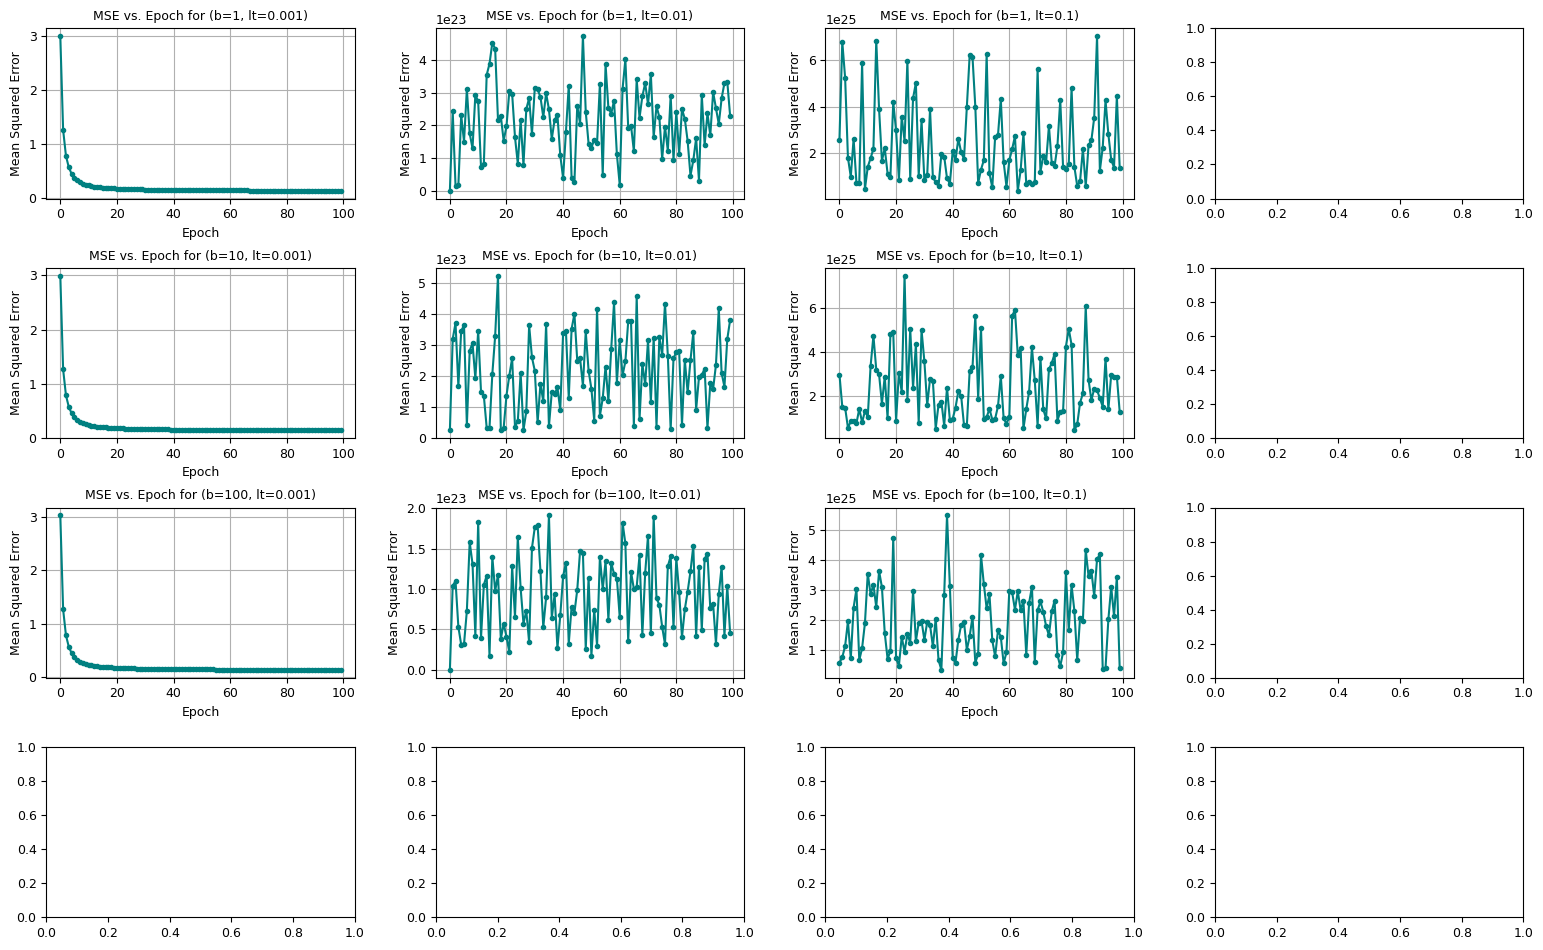

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 4, figsize=(16, 10))
fig.tight_layout(pad=5.0)

for i, b in enumerate(batch_sizes):
    for j, lt in enumerate(learning_rates):
        ax = axs[i, j]
        ax.set_title(f'MSE vs. Epoch for (b={b}, lt={lt})')
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Mean Squared Error')

        filtered_data = {key: mse for key, mse in val_loss.items() if key[:2] == (b, lt)}

        # Sort the data by epoch
        sorted_data = sorted(filtered_data.items(), key=lambda x: x[0][2])

        # Extract epochs and corresponding MSE values
        epochs, mses = zip(*[(key[2], mse) for key, mse in sorted_data])
        ax.plot(epochs, mses, marker='o', linestyle='-', markersize=3, color='#008080')
        ax.grid(True)

plt.show()

Elastic Net with alpha of 0.001 has been judged as the best model with low MSE score for polynomial regression.

Mean Squared Error (MSE): 0.12609455814580783
Mean Absolute Error (MSE): 0.2689238789470685
R-squared (R2): 0.9029197642746964


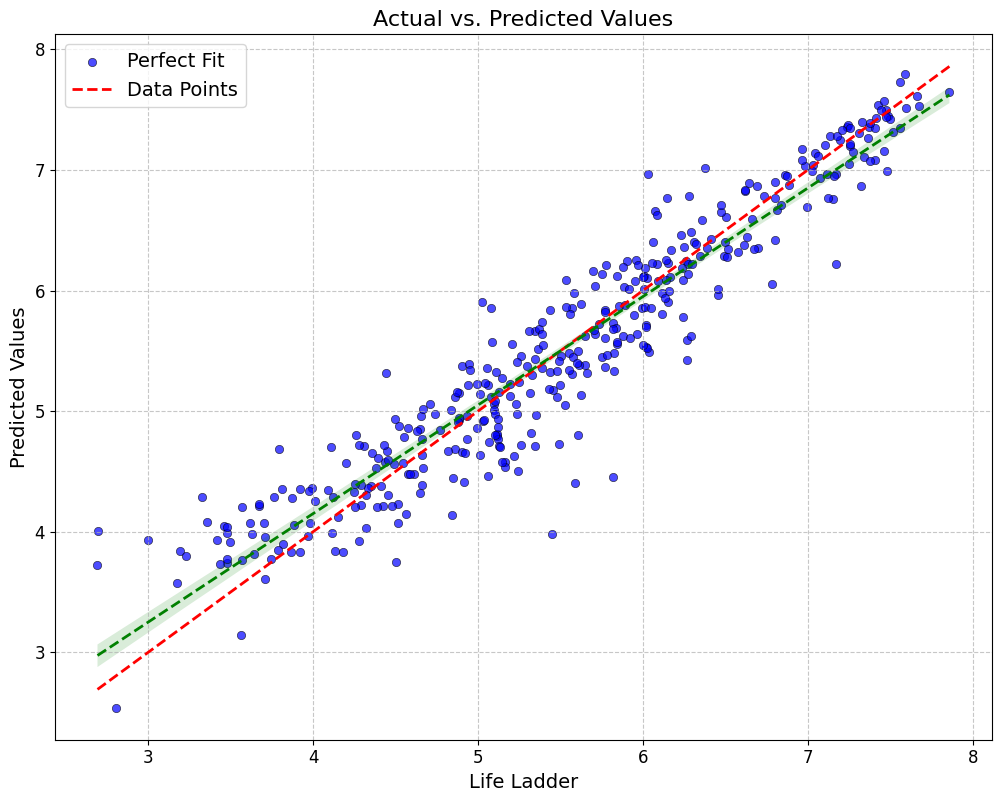

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

elastic_net_main = ElasticNet(alpha=0.001, l1_ratio=0.5,max_iter=100000)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.fit_transform(X_test)
# Make predictions on the test data
elastic_net_main.fit(X_poly_train, y_train)
y_train_pred = elastic_net_main.predict(X_poly_train)
y_test_pred = elastic_net_main.predict(X_poly_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

# Print the evaluation metrics
bold = "\033[1m"
reset = "\033[0m"

print(bold + "Training Mean Squared Error (MSE):" + reset, train_mse)
print(bold + "Testing Mean Squared Error (MSE):" + reset, val_mse)
print(bold + "Testing Mean Absolute Error (MAE):" + reset, mae)
print(bold + "R-squared (R2):" + reset, r2)

plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.7, edgecolors='k', linewidths=0.5)

# Add a line representing a perfect fit (y_test = y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2, label='Perfect Fit')

plt.title('Actual vs. Predicted Values', fontsize=16)
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.legend(['Perfect Fit', 'Data Points'], loc='upper left', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
sns.regplot(x=y_test, y=y_test_pred, scatter=False, color='green', line_kws={"color": "green", "linestyle": "--", "linewidth": 2})

plt.tight_layout()
plt.show()

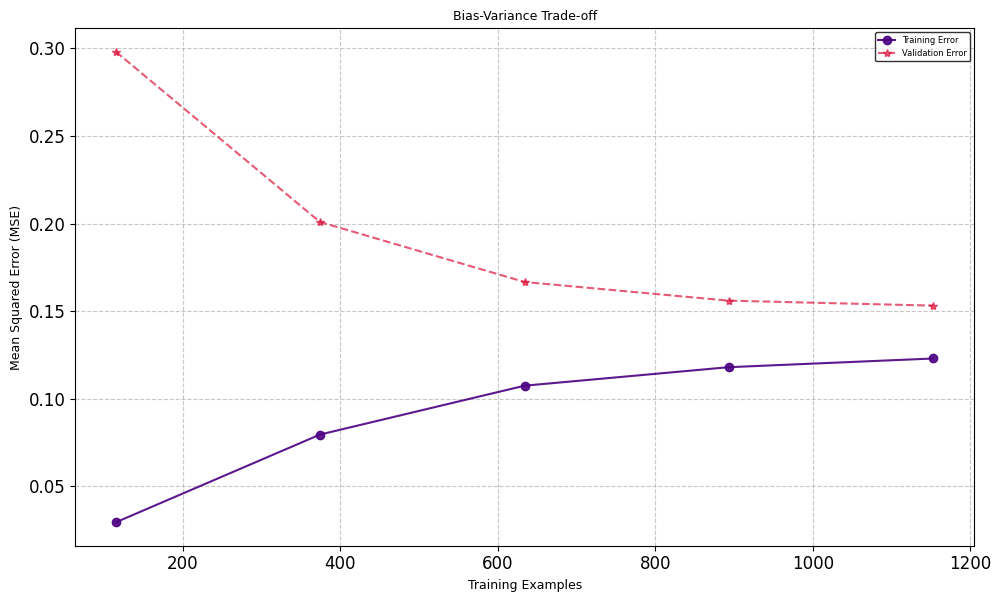

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_bias_variance_tradeoff(model, X, y, cv=4, scoring='neg_mean_squared_error'):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, scoring=scoring)

    train_mse_mean = -np.mean(train_scores, axis=1)
    test_mse_mean = -np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))

    plt.plot(train_sizes, train_mse_mean, label='Training Error', linestyle='-', marker='o', color='indigo', alpha=0.9)
    plt.plot(train_sizes, test_mse_mean, label='Validation Error', linestyle='--', marker='*', color='crimson', alpha=0.7)

    plt.title('Bias-Variance Trade-off')
    plt.xlabel('Training Examples')
    plt.ylabel('Mean Squared Error (MSE)')

    # Add a legend with a fancy box
    plt.legend(loc='best', fancybox=True, framealpha=0.8)

    # Add grid lines with a dashed style
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Add a shadow to the legend frame
    legend = plt.legend()
    legend.get_frame().set_linewidth(1)
    legend.get_frame().set_edgecolor('black')

    # Show the plot
    plt.tight_layout()
    plt.show()

plot_bias_variance_tradeoff(elastic_net_main, X_train, y_train)


The validation error is not lesser than training error, which suggests this model is not overfitting.
Both the training and validation error are in a particularly low range, which suggests the model is not underfitting as well



Future Work :

There are a number of things that can be analysed with the given data :
Of those the 3 major work in our opinion that can yield more insights are the following :
1. How the economic factors of the country influence’s citizen’s happiness.
    1. This can be done by correlating Log GDP per capita vs Freedom , Happiness.
    2. More factors and features can be collected and introduced in the data frame for a robust and efficient model
2. Mental health of people :
    1. Studying the Positive Affect and Negative Affect, along with Corruption , Generosity impact the mental health (the happiness index in our case)
3. Time series analysis :
    1. Progression of features such as happiness, GDP and others with respect to time and in different parts of the world.
    2. Maybe the country information can be grouped with continent for an overall picture.

There are number of more applications that can be accomplished using this data. But this would be a good starting place and could potentially identify some good insights which could give countries the essential feedback on how to function and work on the sectors that they might lack in.

To enhance performance:

Advanced Regularization: Explore advanced regularization methods to mitigate errors and improve model robustness.

Outlier Detection: Identify and handle outliers effectively to ensure they don't adversely affect model performance.

Data Enhancement: Collect additional information, especially from countries with incomplete data, to enhance the model's accuracy.

These steps aim to optimize the model's performance and reliability.

Taken references from 'Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems', Github repo shared by Prof Zoran, and some Kaggle pages.